In [1]:
import uproot	
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from mpl_toolkits import mplot3d
import awkward as ak
from scipy.optimize import curve_fit
from scipy import stats
from methods.fit_linear_regression_model import fit_linear_regression_model
import sklearn
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
def round(n, k):
    # function to round number 'n' up/down to nearest 'k'
    # use positive k to round up
    # use negative k to round down

    return n - n % k

In [3]:
file = uproot.open(
    "tracking_losses_ntuple_B_EndVeloP.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1"
)

# selektiere nur elektronen von B->K*ee
allcolumns = file.arrays()
found = allcolumns[(allcolumns.isElectron) & (~allcolumns.lost) &
                   (allcolumns.fromB)]  # B: 9056
lost = allcolumns[(allcolumns.isElectron) & (allcolumns.lost) &
                  (allcolumns.fromB)]  # B: 1466

electrons = allcolumns[(allcolumns.isElectron)
                       & (allcolumns.fromB)
                       & (allcolumns.eta <= 5.0)
                       & (allcolumns.eta >= 1.5)
                       & (np.abs(allcolumns.phi) < 3.142)]

print(ak.num(found, axis=0), ak.num(lost, axis=0))
print(ak.num(electrons, axis=0))
# ak.count(found, axis=None)

41978 8523
49865


In [4]:
rad_length_found = ak.to_numpy(
    found[(found.eta <= 5.0) & (found.eta >= 1.5) & (np.abs(found.phi) < 3.142)][
        "rad_length_frac"
    ]
)
eta_found = ak.to_numpy(
    found[(found.eta <= 5.0) & (found.eta >= 1.5) & (np.abs(found.phi) < 3.142)]["eta"]
)
phi_found = ak.to_numpy(
    found[(found.eta <= 5.0) & (found.eta >= 1.5) & (np.abs(found.phi) < 3.142)]["phi"]
)
rad_length_lost = ak.to_numpy(
    lost[(lost.eta <= 5.0) & (lost.eta >= 1.5) & (np.abs(lost.phi) < 3.142)][
        "rad_length_frac"
    ]
)
eta_lost = ak.to_numpy(
    lost[(lost.eta <= 5.0) & (lost.eta >= 1.5) & (np.abs(lost.phi) < 3.142)]["eta"]
)
phi_lost = ak.to_numpy(
    lost[(lost.eta <= 5.0) & (lost.eta >= 1.5) & (np.abs(lost.phi) < 3.142)]["phi"]
)

eta_a = ak.to_numpy(electrons["eta"])
phi_a = ak.to_numpy(electrons["phi"])
rad_length_frac_a = ak.to_numpy(electrons["rad_length_frac"])

stretch_factor = ak.num(eta_lost, axis=0) / ak.num(eta_found, axis=0)
print("stretch factor: ", stretch_factor)

stretch factor:  0.1943140448361755


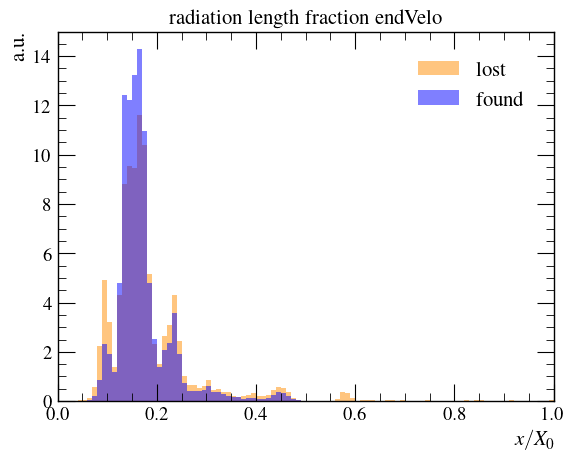

In [5]:
plt.hist(
    rad_length_lost,
    bins=100,
    density=True,
    alpha=0.5,
    color="darkorange",
    histtype="bar",
    label="lost",
    range=[0, 1],
)
plt.hist(
    rad_length_found,
    bins=100,
    density=True,
    alpha=0.5,
    color="blue",
    histtype="bar",
    label="found",
    range=[0, 1],
)
plt.xlim(0, 1)
# plt.yscale("log")
plt.title("radiation length fraction endVelo2endUT")
plt.xlabel(f"$x/X_0$")
plt.ylabel("a.u.")

plt.legend()
plt.show()

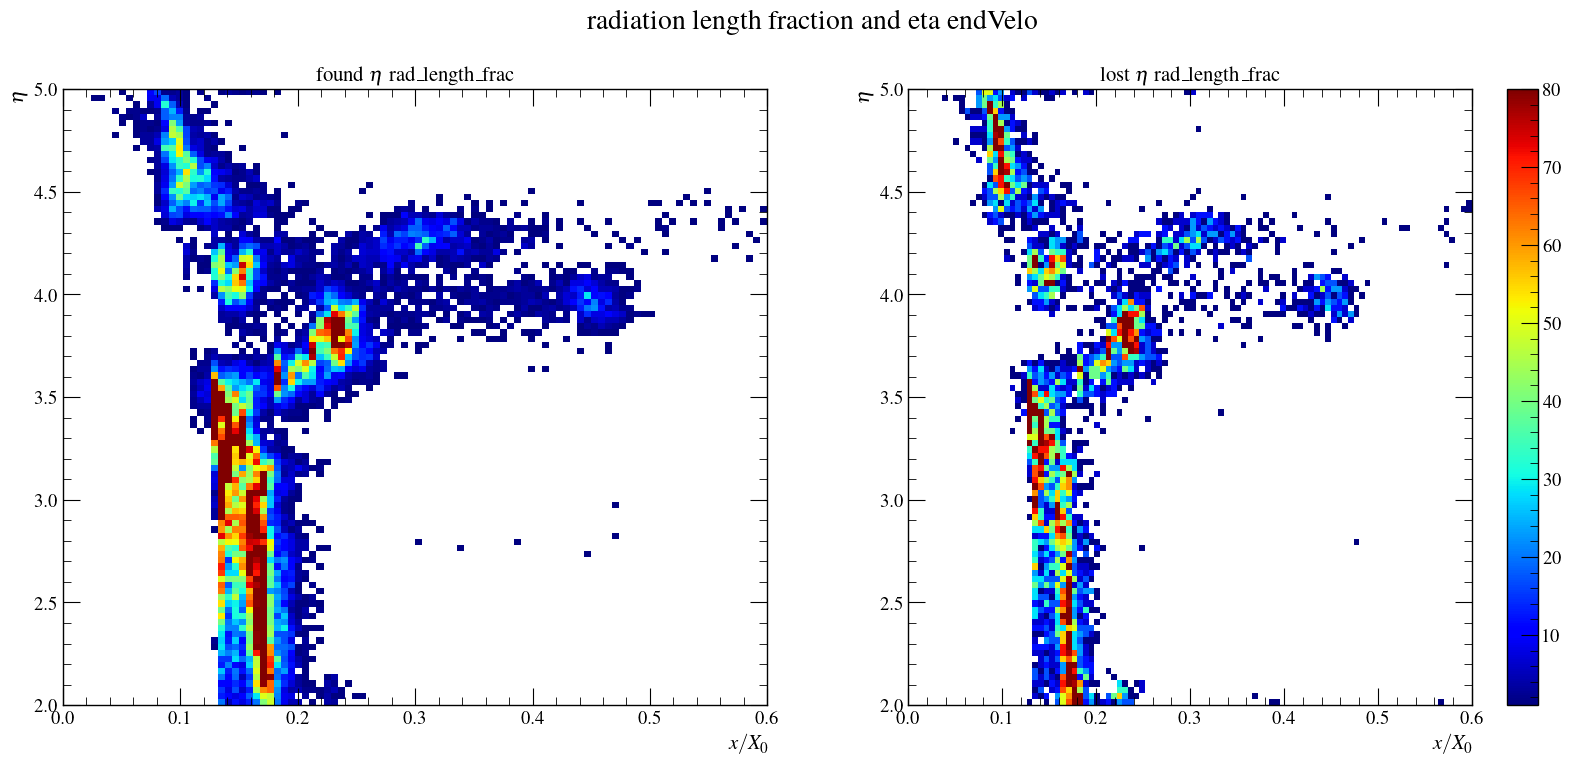

In [6]:
nbins = 100
vmax = 80

fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

a0 = ax0.hist2d(
    rad_length_found,
    eta_found,
    density=False,
    bins=nbins,
    cmap=plt.cm.jet,
    cmin=1,
    vmax=vmax,
    range=[[0, 0.6], [2, 5]],
)
ax0.set_xlabel(f"$x/X_0$")
ax0.set_ylabel(f"$\eta$")
ax0.set_title(f"found $\eta$ rad_length_frac")

a1 = ax1.hist2d(
    rad_length_lost,
    eta_lost,
    density=False,
    bins=nbins,
    cmap=plt.cm.jet,
    cmin=1,
    vmax=vmax * stretch_factor,
    range=[[0, 0.6], [2, 5]],
)
ax1.set_xlabel(f"$x/X_0$")
ax1.set_ylabel(f"$\eta$")
ax1.set_title(f"lost $\eta$ rad_length_frac")
# ax1.set(xlim=(0,4000), ylim=(-1000,1000))

plt.suptitle("radiation length fraction and eta endVelo")
plt.colorbar(a0[3], ax=ax1)

plt.show()

Parameterisation for rad_length_frac:
intercept= 0.0
coef= {'1': 0.19830920321074946, 'x': -4.49175976974402e-05, 'y': 0.00039490060416272056, 'tx': 0.00015102371088508598, 'ty': -0.3004315695136339, 'qop': -15.314945266490128, 'x^2': -1.8619394568578818e-05, 'x y': -4.953907513838906e-06, 'x tx': 0.021617503882699386, 'x ty': 0.03829244150062255, 'x qop': -0.41798007270055415, 'y^2': -2.4410328131494868e-05, 'y tx': -0.03443063985633742, 'y ty': 0.024201355785359608, 'y qop': 0.069823295273139, 'tx^2': -9.507076220830514, 'tx ty': -0.3980701633198789, 'tx qop': -0.04742639222342226, 'ty^2': -5.342167619183405, 'ty qop': 0.04842038611881145, 'qop^2': 0.2070268831284635, 'x^3': 1.5823479402461545e-07, 'x^2 y': -5.806838940825474e-07, 'x^2 tx': -0.00023418353598118923, 'x^2 ty': 0.0037081774556846224, 'x^2 qop': 0.01641641113222204, 'x y^2': 6.398758958085149e-08, 'x y tx': -0.002932641224303519, 'x y ty': -0.001396824762733282, 'x y qop': -0.020888196868450136, 'x tx^2': 0.0909690812412

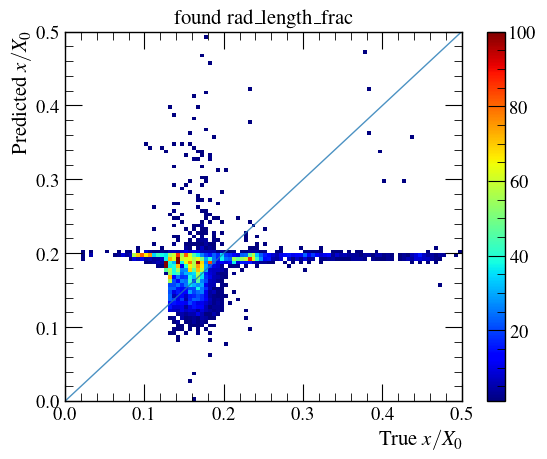

In [7]:
rad_length_frac = found["rad_length_frac"]
# @ z = 9400.mm or 770.mm
state = 1

if state == 1:
    slopex = found["ideal_state_770_tx"]
    slopey = found["ideal_state_770_ty"]
    x = found["ideal_state_770_x"]
    y = found["ideal_state_770_y"]
    qop = found["ideal_state_770_qop"]
elif state == 2:
    slopex = found["ideal_state_9410_tx"]
    slopey = found["ideal_state_9410_ty"]
    x = found["ideal_state_9410_x"]
    y = found["ideal_state_9410_y"]
    qop = found["ideal_state_9410_qop"]

data = ak.zip(
    {
        "rad_length_frac": rad_length_frac,
        "x": x,
        "y": y,
        "tx": slopex,
        "ty": slopey,
        "qop": qop,
    }
)
lin_reg, features, xx0_test, xx0_predicted = fit_linear_regression_model(
    data,
    "rad_length_frac",
    ["x", "y", "tx", "ty", "qop"],
    5,
    include_bias=True,
)

nbins = 100
vmax = 100

a0 = plt.hist2d(
    xx0_test,
    xx0_predicted,
    density=False,
    bins=nbins,
    cmap=plt.cm.jet,
    cmin=1,
    vmax=vmax,
    range=[[0, 0.5], [0, 0.5]],
)
plt.plot([0, 0.5], [0, 0.5], marker="", alpha=0.8)
plt.xlabel(f"True $x/X_0$")
plt.ylabel(f"Predicted $x/X_0$")
plt.title(f"found rad_length_frac")

plt.colorbar(a0[3])
plt.show()

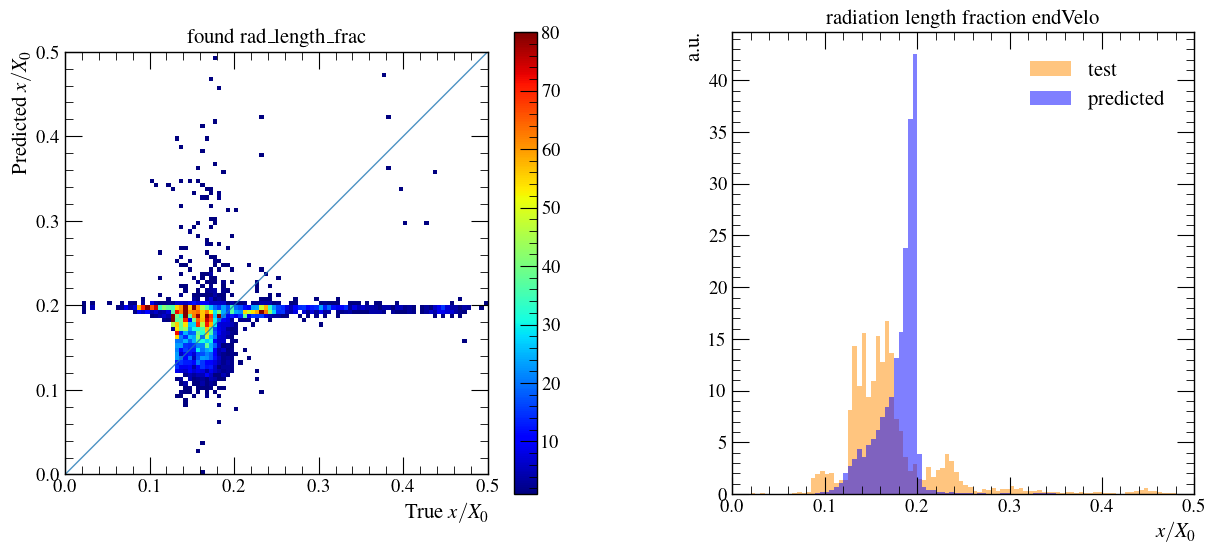

In [8]:
nbins = 100
vmax = 80

fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# ax0.set_aspect("equal")

a0 = ax0.hist2d(
    xx0_test,
    xx0_predicted,
    density=False,
    bins=nbins,
    cmap=plt.cm.jet,
    cmin=1,
    vmax=vmax,
    range=[[0, 0.5], [0, 0.5]],
)
ax0.plot([0, 0.5], [0, 0.5], marker="", alpha=0.8)
ax0.set_box_aspect(1)
ax0.set_xlabel(f"True $x/X_0$")
ax0.set_ylabel(f"Predicted $x/X_0$")
ax0.set_title(f"found rad_length_frac")
plt.colorbar(a0[3], ax=ax0)

ax1.hist(
    xx0_test,
    bins=100,
    density=True,
    alpha=0.5,
    color="darkorange",
    histtype="bar",
    label="test",
    range=[0, 0.5],
)
ax1.hist(
    xx0_predicted,
    bins=100,
    density=True,
    alpha=0.5,
    color="blue",
    histtype="bar",
    label="predicted",
    range=[0, 0.5],
)
ax1.set_xlim(0, 0.5)
ax1.set_title("radiation length fraction endVelo")
ax1.set_xlabel(f"$x/X_0$")
ax1.set_ylabel("a.u.")
ax1.set_box_aspect(1)

ax1.legend()

# plt.gca().set_aspect("equal")
plt.show()

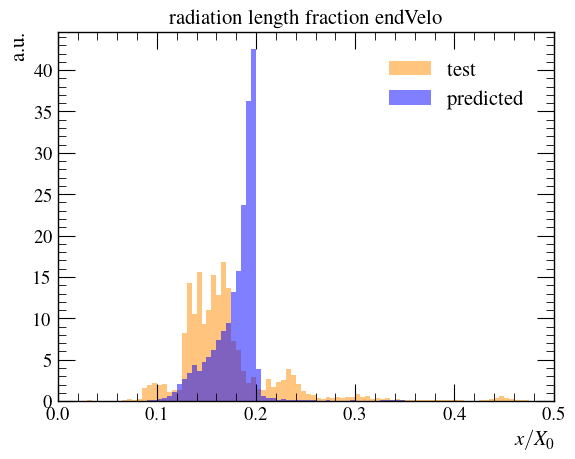

In [9]:
plt.hist(
    xx0_test,
    bins=100,
    density=True,
    alpha=0.5,
    color="darkorange",
    histtype="bar",
    label="test",
    range=[0, 0.5],
)
plt.hist(
    xx0_predicted,
    bins=100,
    density=True,
    alpha=0.5,
    color="blue",
    histtype="bar",
    label="predicted",
    range=[0, 0.5],
)
plt.xlim(0, 0.5)
# plt.yscale("log")
plt.title("radiation length fraction endVelo")
plt.xlabel(f"$x/X_0$")
plt.ylabel("a.u.")

plt.legend()
plt.show()

Parameterisation for rad_length_frac:
intercept= 0.0
coef= {'1': 0.2484410418213911, 'x': -0.0007601095488043627, 'y': 0.0010569724392146917, 'tx': 0.6185505303064777, 'ty': -0.9394058560136732, 'qop': -9.741031889614183, 'x^2': -0.00016580416280366622, 'x y': 5.149038989659081e-05, 'x tx': 0.22996768886351043, 'x ty': -0.043161009059129354, 'x qop': -0.21658279194428842, 'y^2': 3.9826067539320166e-05, 'y tx': -0.033498957247677735, 'y ty': -0.08085122767618998, 'y qop': 0.06428923004582791, 'tx^2': -83.06687438225835, 'tx ty': 28.76266798578089, 'tx qop': -0.32072666519746007, 'ty^2': 32.80290436519906, 'ty qop': 0.29785759094660047, 'qop^2': 0.7177557091128425, 'x^3': -1.037888276319177e-06, 'x^2 y': 5.744977724613286e-07, 'x^2 tx': 0.0016261562680787358, 'x^2 ty': 0.00819223051446815, 'x^2 qop': 0.014940216048602184, 'x y^2': 1.55836456652794e-06, 'x y tx': -0.009042353485603404, 'x y ty': 0.002769481233443616, 'x y qop': 0.007035099510620806, 'x tx^2': -0.623629094925692, 'x tx ty'

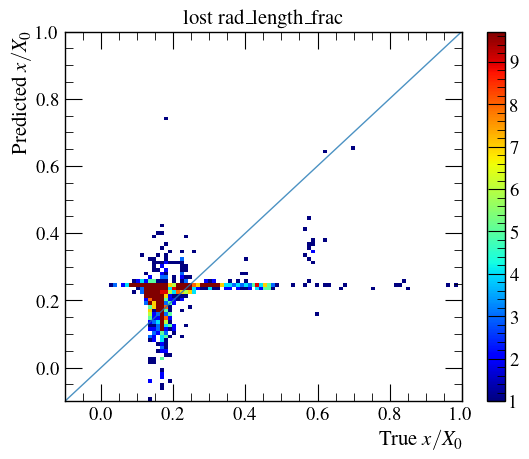

In [10]:
rad_length_frac = lost["rad_length_frac"]
# @ z = 9400.mm or 770.mm
state = 1

if state == 1:
    slopex = lost["ideal_state_770_tx"]
    slopey = lost["ideal_state_770_ty"]
    x = lost["ideal_state_770_x"]
    y = lost["ideal_state_770_y"]
    qop = lost["ideal_state_770_qop"]
elif state == 2:
    slopex = lost["ideal_state_9410_tx"]
    slopey = lost["ideal_state_9410_ty"]
    x = lost["ideal_state_9410_x"]
    y = lost["ideal_state_9410_y"]
    qop = lost["ideal_state_9410_qop"]

data = ak.zip({
    "rad_length_frac": rad_length_frac,
    "x": x,
    "y": y,
    "tx": slopex,
    "ty": slopey,
    "qop": qop,
})
lin_reg, features, xx0_test, xx0_predicted = fit_linear_regression_model(
    data,
    "rad_length_frac",
    ["x", "y", "tx", "ty", "qop"],
    5,
    include_bias=True,
)

nbins = 100
vmax = 50

a0 = plt.hist2d(
    xx0_test,
    xx0_predicted,
    density=False,
    bins=nbins,
    cmap=plt.cm.jet,
    cmin=1,
    vmax=vmax * stretch_factor,
    range=[[-0.1, 1.0], [-0.1, 1.0]],
)
plt.plot([-0.1, 1.0], [-0.1, 1.0], marker="", alpha=0.8)
plt.xlabel(f"True $x/X_0$")
plt.ylabel(f"Predicted $x/X_0$")
plt.title(f"lost rad_length_frac")
# ax1.set(xlim=(0,4000), ylim=(-1000,1000))

plt.colorbar(a0[3])
plt.show()

In [11]:
df = pd.DataFrame(
    {
        "phi": phi_a * 90.0 / np.pi,
        "eta": eta_a,
        "rad_length_frac": rad_length_frac_a,
    }
)
df = df.round({"phi": 0, "eta": 1, "rad_length_frac": 4})

In [12]:
df_pivoted = df.pivot_table(
    index="eta",
    columns="phi",
    values="rad_length_frac",
    margins=False,
    fill_value=0,
)

In [13]:
df_pivoted

phi     -90.0     -89.0     -88.0     -87.0     -86.0     -85.0     -84.0  \
eta                                                                         
1.5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1.6  0.000000  0.745900  0.000000  0.746800  0.000000  0.000000  0.000000   
1.7  0.000000  1.178400  0.295200  0.743500  0.379000  0.614800  1.693300   
1.8  0.381100  0.386050  0.243450  0.168900  0.000000  0.229833  0.229900   
1.9  0.153000  0.000000  0.142200  0.239467  0.295500  0.150900  0.273500   
2.0  0.151000  0.137790  0.139500  0.141687  0.162550  0.160067  0.161450   
2.1  0.132200  0.137630  0.147300  0.136700  0.139863  0.165500  0.150780   
2.2  0.138267  0.136160  0.137342  0.136750  0.138395  0.161375  0.155864   
2.3  0.140120  0.135150  0.136392  0.136000  0.135283  0.138733  0.162330   
2.4  0.146343  0.137150  0.140820  0.137143  0.134425  0.138600  0.153840   
2.5  0.138550  0.137725  0.135490  0.134900  0.136400  0.137218  0.139250   
2.6  0.137725  0.134624  0.135183  0.134150  0.135617  0.134246  0.135311   
2.7  0.135840  0.135129  0.132957  0.132900  0.133153  0.132860  0.135122   
2.8  0.146100  0.139309  0.138750  0.138678  0.136657  0.135780  0.135900   
2.9  0.138650  0.137057  0.140111  0.136422  0.135869  0.136715  0.138400   
3.0  0.140580  0.132220  0.132673  0.132340  0.132370  0.132330  0.132350   
3.1  0.140850  0.133550  0.132243  0.133160  0.132200  0.135089  0.133630   
3.2  0.141883  0.138843  0.137400  0.138456  0.135829  0.134738  0.133143   
3.3  0.139400  0.136378  0.137167  0.134940  0.132460  0.136362  0.133274   
3.4  0.141000  0.130790  0.129220  0.129329  0.130916  0.129267  0.128655   
3.5  0.133933  0.140282  0.135745  0.147691  0.127075  0.134500  0.130312   
3.6  0.157160  0.150125  0.190522  0.163414  0.153340  0.182489  0.146633   
3.7  0.212600  0.203550  0.182613  0.217033  0.196530  0.192733  0.196800   
3.8  0.258014  0.226800  0.214507  0.220812  0.212843  0.213190  0.214863   
3.9  0.312460  0.259640  0.229650  0.263078  0.252018  0.237225  0.237745   
4.0  0.261700  0.265618  0.158400  0.276025  0.353650  0.274587  0.289418   
4.1  0.141975  0.146789  0.188287  0.179920  0.178042  0.198750  0.169862   
4.2  0.208650  0.172833  0.240123  0.270567  0.174783  0.187754  0.257860   
4.3  0.488733  0.894550  0.438914  0.666500  0.436417  0.223957  0.315433   
4.4  0.104350  0.507614  1.530550  0.909633  0.000000  0.779233  0.098667   
4.5  0.000000  0.104690  0.118533  0.121583  0.092800  0.092717  0.100013   
4.6  0.104450  0.103500  0.095200  0.096600  0.100317  0.097909  0.099567   
4.7  0.094300  0.101400  0.099475  0.098700  0.095050  0.095020  0.095925   
4.8  0.000000  0.094333  0.097750  0.099525  0.094929  0.089000  0.092600   
4.9  0.092200  0.092300  0.091700  0.088420  0.092600  0.089000  0.085100   
5.0  0.000000  0.141100  0.076200  0.119100  0.000000  0.178500  0.090000   

phi     -83.0     -82.0     -81.0  ...      81.0      82.0      83.0  \
eta                                ...                                 
1.5  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1.6  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1.7  0.000000  0.930075  0.111500  ...  0.381300  0.000000  0.000000   
1.8  0.390667  0.165900  0.327267  ...  0.223500  0.236243  0.883980   
1.9  0.161000  0.867600  0.000000  ...  0.220200  0.171267  0.163900   
2.0  0.149060  0.169400  0.176289  ...  0.172440  0.176475  0.153450   
2.1  0.149290  0.152229  0.168450  ...  0.165614  0.155900  0.150020   
2.2  0.150350  0.148888  0.153114  ...  0.155750  0.149120  0.148875   
2.3  0.156182  0.147925  0.145092  ...  0.159367  0.148900  0.155467   
2.4  0.162650  0.154400  0.144275  ...  0.143763  0.151444  0.157156   
2.5  0.156625  0.159414  0.147300  ...  0.149229  0.158000  0.151414   
2.6  0.144350  0.158150  0.156129  ...  0.157864  0.157836  0.145880   
2.7  0.136907  0.148817  0.159080  ...  0.161543  0.151389  0.139

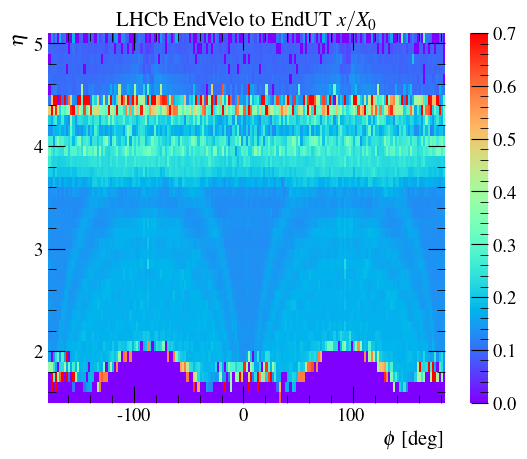

In [14]:
ax = sns.heatmap(
    df_pivoted,
    robust=True,
    square=False,
    cmap=colormaps["rainbow"],
    xticklabels=False,
    yticklabels=False,
    vmax=0.7,
)
ax.set_yticks([5, 15, 25, 35], [2, 3, 4, 5])
ax.set_xticks([39, 89, 139],
              [-100, 0, 100])  # ([79, 179, 279], [-100, 0, 100])
ax.set_xlabel(f"$\phi$ [deg]")
ax.set_ylabel(f"$\eta$")

# ax.set_yticklabels([])
ax.invert_yaxis()
ax.set_title("LHCb EndVelo to EndUT $x/X_0$")
plt.show()

In [ ]:
# make these smaller to increase the resolution
dy, dx = 0.1, 1.0

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1.5, 5 + dy, dy), slice(-180, 180 + dx, dx)]

plt.pcolormesh(x, y, df_pivoted, cmap=colormaps["jet"], vmax=0.7)

plt.colorbar()
plt.show()